# <a id='toc1_'></a>[Data Explorations](#toc0_)

Here we are looking at taking our sample of the amazon reviews dataset and exploring it. We divide the section into two parts. 

1. A quick overview of the data - shape, size, features etc.
2. A more detailed look at the data - distributions, correlations etc.


We have our dataset `amz_rev_cleaned.csv` which shall be loaded and used.

**Table of contents**<a id='toc0_'></a>    
- [Data Explorations](#toc1_)    
- [Data Loading and Setup](#toc2_)    
- [Summary of the Data](#toc3_)    
- [Distribution Plots](#toc4_)    
  - [Ratings](#toc4_1_)    
  - [Categories](#toc4_2_)    
- [Some Interesting Plots](#toc5_)    
  - [Ratings vs. Review Length (Word/Character/Sentence Count or Length)](#toc5_1_)    
  - [Reviewers](#toc5_2_)    
    - [Top 10 Reviewers by Number of Reviews](#toc5_2_1_)    
    - [Average Rating against Number of Reviews per Reviewer](#toc5_2_2_)    
    - [Top 10 Reviewers by Length of Reviews](#toc5_2_3_)    
    - [Top 10 Reviewers by Average Rating (with at least 10 reviews)](#toc5_2_4_)    
    - [Top 10 Reviewers by Review Count](#toc5_2_5_)    
  - [Products](#toc5_3_)    
    - [Top 10 Products by Number of Reviews](#toc5_3_1_)    
    - [Product Average Rating vs. Number of Reviews](#toc5_3_2_)    
    - [Number of Reviews per Product over Time](#toc5_3_3_)    
    - [Average Rating per Product over Time](#toc5_3_4_)    
  - [Categories](#toc5_4_)    
    - [Top 10 Categories by Number of Reviews](#toc5_4_1_)    
    - [Top 10 Categories by Average Rating](#toc5_4_2_)    
    - [Top 10 Categories by Average Review Length](#toc5_4_3_)    
    - [Average Rating of Categories over Time](#toc5_4_4_)    
    - [Top Brands in each Category by their Average Rating](#toc5_4_5_)    
    - [Top Brands in each Category by the Number of Reviews](#toc5_4_6_)    
  - [Reviews and Review Text](#toc5_5_)    
    - [Top 10 Reviews by Length](#toc5_5_1_)    
    - [Average Review Length over Time](#toc5_5_2_)    
    - [Number of Reviews over Time](#toc5_5_3_)    
    - 
  - [Brands](#toc5_6_)    
    - [Top 10 Brands by Number of Reviews](#toc5_6_1_)    
    - [Top 10 Brands by Average Rating](#toc5_6_2_)    
    - [Average Rating of Brands over Time for Top 10 Brands](#toc5_6_3_)    
- [Sentiment Analysis](#toc6_)    
  - [Sentiment Lexicons](#toc6_1_)    
  - [Sentiment per Review](#toc6_2_)    
    - [Most Positive Reviews](#toc6_2_1_)    
    - [Most Negative Reviews](#toc6_2_2_)    
    - [Most Positive Reviewers](#toc6_2_3_)    
    - [Most Negative Reviewers](#toc6_2_4_)    
    - [Distribution of Sentiment Scores](#toc6_2_5_)    
  - [Sentiment per Product](#toc6_3_)    
    - [Most Positive Products](#toc6_3_1_)    
    - [Most Negative Products](#toc6_3_2_)    
  - [Sentiment per Category](#toc6_4_)    
    - [Most Positive Categories](#toc6_4_1_)    
    - [Most Negative Categories](#toc6_4_2_)    
  - [Sentiment per Brand](#toc6_5_)    
    - [Most Positive Brands](#toc6_5_1_)    
    - [Most Negative Brands](#toc6_5_2_)    
  - [Feature Engineering](#toc6_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Loading and Setup](#toc0_)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt')


In [2]:
# load full data
data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_with_senti.csv')

# load sample data
#data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_with_senti_sample.csv')

# <a id='toc3_'></a>[Summary of the Data](#toc0_)

In [3]:
# view the data 
display(data.head(4))

# shape of data
print("Shape of Data:", data.shape, '\n')

# columns in data
print("Columns in Data:", data.columns, '\n')

,reviewerID,reviewerName,reviewTime,asin,title,brand,description,reviewText,category_x,overall,...,filtered_tokens_desc,sentiments_vader_revText,sentiments_textblob_revText,subjectivities_textblob_revText,sentiment_score_afinn_desc,sentiment_score_afinn_revText,sentiment_score_bing_desc,sentiment_score_bing_revText,sentiment_score_nrc_desc,sentiment_score_nrc_revText
0,A3WJELEV137U,John Bennett,2015-06-05,0001526863,steve green hide em in your heart 13 bible mem...,steve green,steve green hide em in your heart 13 bible mem...,product worked as advertised and am pleased wi...,movies and tv,5.0,...,"['steve', 'green', 'hide', 'em', 'heart', '13'...","{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.500000,1.000000,-1,3,0,2,trust,positive
1,A3OJM6TXMK3J53,samson,2015-12-05,0005164885,christmas eve and other stories,trans siberian orchestra,this is a concept album all the way with tales...,nice to hear this cd beautiful,cds and vinyl,5.0,...,"['concept', 'album', 'way', 'tales', 'christma...","{'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...",0.725000,1.000000,4,6,5,2,positive,positive
2,A14YR7QK3ASFFW,Amazon Customer,2001-04-24,0005465079,forgiven,don francisco,1 jesus lord of the way i feel 2 jehoshaphat 3...,that one song has to be one of the best in ccm...,cds and vinyl,5.0,...,"['1', 'jesus', 'lord', 'way', 'feel', '2', 'je...","{'neg': 0.058, 'neu': 0.803, 'pos': 0.139, 'co...",0.361944,0.435278,2,4,2,3,trust,sadness
3,A1VE933MFXTG18,sj,2016-02-21,0307142493,santa claus is comin to town vhs,fred astaire,this is the vhs movie santa claus is comin to ...,i just love these older movies they really are...,movies and tv,5.0,...,"['vhs', 'movie', 'santa', 'claus', 'comin', 't...","{'neg': 0.034, 'neu': 0.663, 'pos': 0.303, 'co...",0.316534,0.575970,1,24,3,5,trust,positive


Shape of Data: (496219, 26) 

Columns in Data: Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText',
       'stemmed_words_desc', 'lemmatized_words_desc', 'filtered_tokens_desc',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText', 'sentiment_score_afinn_desc',
       'sentiment_score_afinn_revText', 'sentiment_score_bing_desc',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_desc',
       'sentiment_score_nrc_revText'],
      dtype='object') 



In [4]:
# summary of data
print("Number of reviews:", data.shape[0])
print("Number of Customers:", data.reviewerID.unique().size)
print("Number of unique products:", data.asin.nunique())
print("Number of unique reviewers:", data.reviewerID.nunique())
print("Number of unique brands:", data.brand.nunique())
print("Number of unique categories:", data.category_x.nunique())

# numerical summary of data
print("\n",data.describe())

Number of reviews: 496219
Number of Customers: 339625
Number of unique products: 251615
Number of unique reviewers: 339625
Number of unique brands: 68502
Number of unique categories: 26

              overall  normalized_rating  sentiments_textblob_revText  \
count  496219.000000      496219.000000                496219.000000   
mean        4.383623           0.845906                     0.307026   
std         1.086642           0.271661                     0.294215   
min         1.000000           0.000000                    -1.000000   
25%         4.000000           0.750000                     0.100000   
50%         5.000000           1.000000                     0.265278   
75%         5.000000           1.000000                     0.500000   
max         5.000000           1.000000                     1.000000   

       subjectivities_textblob_revText  sentiment_score_afinn_desc  \
count                    496219.000000               496219.000000   
mean                   

# Missing Data Visualised


 There are missing values in the data.


,reviewerID,reviewerName,reviewTime,asin,title,brand,description,reviewText,category_x,overall,...,filtered_tokens_desc,sentiments_vader_revText,sentiments_textblob_revText,subjectivities_textblob_revText,sentiment_score_afinn_desc,sentiment_score_afinn_revText,sentiment_score_bing_desc,sentiment_score_bing_revText,sentiment_score_nrc_desc,sentiment_score_nrc_revText
5,A2AXULQJ2Q88HX,Amazon Customer,2016-07-21,0310432065,trifold organizer black xxl book and bible cover,visit amazons zondervan page,NaN,wonderful,office products,5.0,...,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",1.000000,1.000000,0,4,0,1,trust,trust
42,A1GQAKL9CGQLP1,L. M. Keefer,2016-05-05,0439499887,high frequency level 2 word wall words,scholastic,NaN,i bought this book for my niece as she is a bi...,office products,5.0,...,[],"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.200000,0.200000,0,8,0,-1,trust,trust
43,ARILW21EJ5490,Skylar,2017-02-05,0439499887,high frequency level 2 word wall words,scholastic,NaN,gift for granddaughter,office products,4.0,...,[],"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.000000,0.000000,0,2,0,0,trust,surprise
48,A1V3HIL2GPYKC,Jillian S,2018-04-23,0486413012,butterfly notebook,sovak,NaN,i like that the pages are not lined i can take...,office products,5.0,...,[],"{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'comp...",0.338889,0.561111,0,8,0,5,trust,trust
50,AKTE5B2J16JX4,Windwhispers,2015-04-26,0528002279,rand mcnally usa wall map,rand mcnally and company,NaN,if you are looking for a durable wall map of t...,office products,5.0,...,[],"{'neg': 0.048, 'neu': 0.766, 'pos': 0.186, 'co...",0.136515,0.310909,0,13,0,5,trust,trust



 Columns with Missing Data:
 reviewerID                             0
reviewerName                          93
reviewTime                             0
asin                                   0
title                                  3
brand                                137
description                        60249
reviewText                           138
category_x                             0
overall                                0
normalized_rating                      0
stemmed_words_revText                  0
lemmatized_words_revText               0
filtered_tokens_revText                0
stemmed_words_desc                     0
lemmatized_words_desc                  0
filtered_tokens_desc                   0
sentiments_vader_revText               0
sentiments_textblob_revText            0
subjectivities_textblob_revText        0
sentiment_score_afinn_desc             0
sentiment_score_afinn_revText          0
sentiment_score_bing_desc              0
sentiment_score_bing_revTex

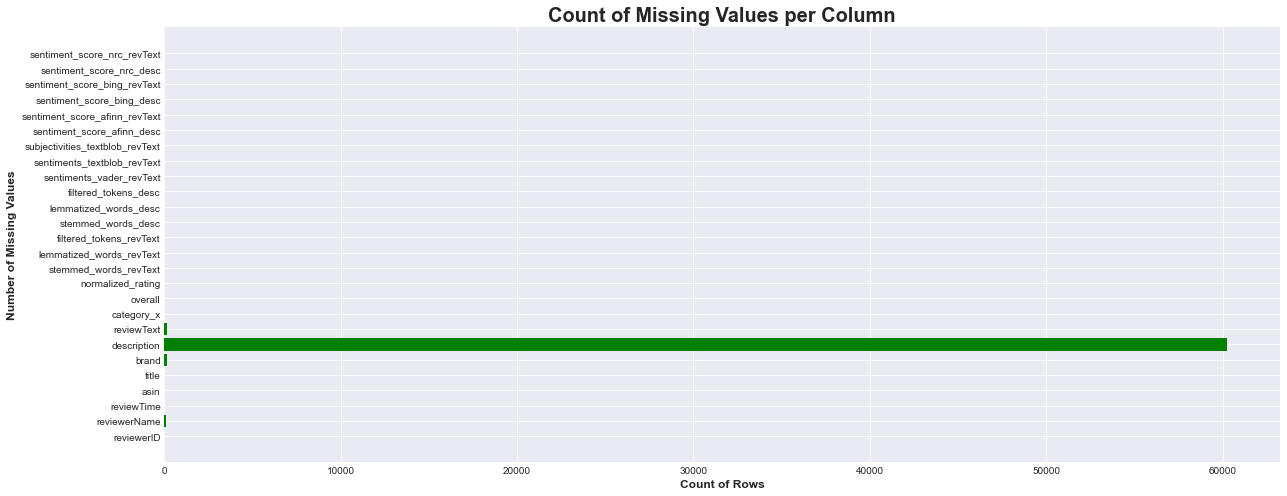

In [5]:
# Missing values
is_na = data.isna().any().any()

# if there are NA values in columns -> show rows, show number of NAs per column
if is_na:
    print("\n There are missing values in the data.")
    display(data[data.isna().any(axis=1)].head(5))
    print("\n Columns with Missing Data:\n", data.isna().sum())
    missing_values_count = data.isna().sum()
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(20, 8))
    plt.barh(y=missing_values_count.index, width=missing_values_count.values, color="green")
    plt.xlabel("Count of Rows", fontsize=12, fontweight='semibold')
    plt.ylabel("Number of Missing Values", fontsize=12, fontweight='semibold')
    plt.title("Count of Missing Values per Column", fontsize=20, fontweight='bold')
    plt.show()

else:
    print("There are no missing values in the data.")

In [7]:
# only keep columns that are needed - drop description columns including sentiment scores
data = data[['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText','sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText','sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiment_score_nrc_revText']]
data.head(2)

,reviewerID,reviewerName,reviewTime,asin,title,brand,description,reviewText,category_x,overall,normalized_rating,stemmed_words_revText,lemmatized_words_revText,filtered_tokens_revText,sentiments_vader_revText,sentiments_textblob_revText,subjectivities_textblob_revText,sentiment_score_afinn_revText,sentiment_score_bing_revText,sentiment_score_nrc_revText
0,A3WJELEV137U,John Bennett,2015-06-05,0001526863,steve green hide em in your heart 13 bible mem...,steve green,steve green hide em in your heart 13 bible mem...,product worked as advertised and am pleased wi...,movies and tv,5.0,1.0,"['product', 'work', 'advertis', 'pleas', 'resu...","['product', 'worked', 'advertised', 'pleased',...","['product', 'worked', 'advertised', 'pleased',...","{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.500,1.0,3,2,positive
1,A3OJM6TXMK3J53,samson,2015-12-05,0005164885,christmas eve and other stories,trans siberian orchestra,this is a concept album all the way with tales...,nice to hear this cd beautiful,cds and vinyl,5.0,1.0,"['nice', 'hear', 'cd', 'beauti']","['nice', 'hear', 'cd', 'beautiful']","['nice', 'hear', 'cd', 'beautiful']","{'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...",0.725,1.0,6,2,positive


***
# <a id='toc4_'></a>[Distribution Plots](#toc0_)

In [8]:
data.columns

Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'title', 'brand',
       'description', 'reviewText', 'category_x', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText', 'sentiment_score_afinn_revText',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_revText'],
      dtype='object')

## <a id='toc4_1_'></a>[Ratings](#toc0_)

Proportion of Review Ratings:
 5.0    0.675992
4.0    0.163936
3.0    0.075277
1.0    0.047501
2.0    0.037294
Name: overall, dtype: float64


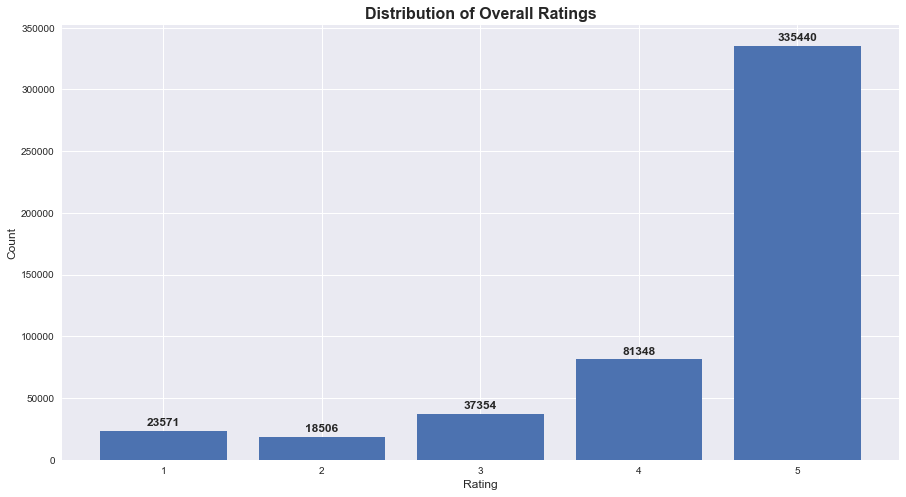

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to "seaborn"
plt.style.use('seaborn')

# Distribution of ratings
print("Proportion of Review Ratings:\n", data['overall'].value_counts(normalize=True))

# Make 'overall' into categorical variable
ratings = data['overall'].astype('category')

# Calculate the count for each rating category
rating_counts = ratings.value_counts().sort_index()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(rating_counts.index, rating_counts.values, color='#4c72b0')

# Annotate the height of each bar
for rect in bars:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                weight='semibold',
                fontsize=12)

# Add title and axis labels
ax.set_title("Distribution of Overall Ratings", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()


## <a id='toc4_2_'></a>[Categories](#toc0_)

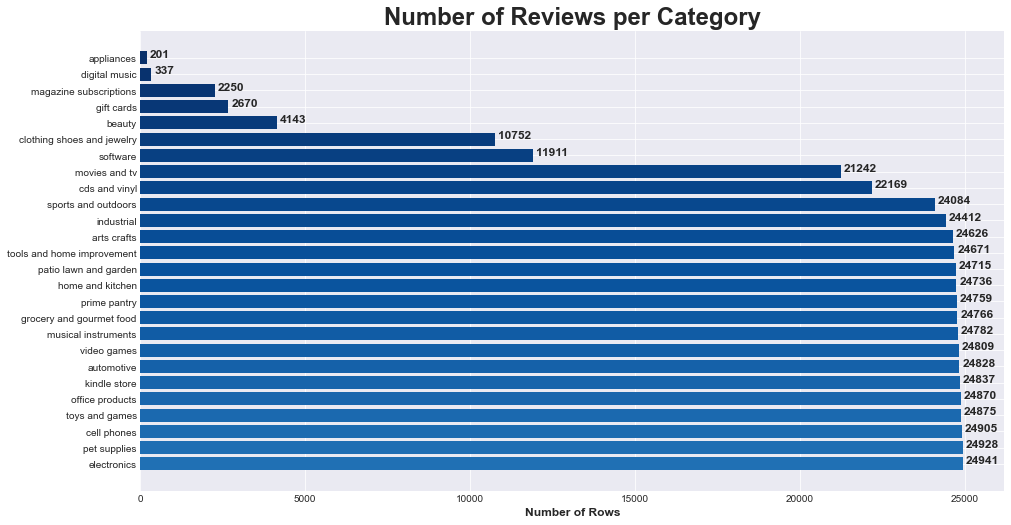

In [23]:
# biggest companies (most movies) - over 100 movies
value_counts_cat = data.category_x.value_counts()
colors = cm.Blues(np.linspace(0.75, 1, len(value_counts_cat)))

# Production Companies with most movies - bar
fig = plt.figure(figsize=(15, 8)) # create figure
bar = plt.barh(y=value_counts_cat.index, width=value_counts_cat.values, color=colors)
plt.title("Number of Reviews per Category", fontsize=24, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 10), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)

plt.show()


***
# <a id='toc5_2_'></a>[Reviewers](#toc0_)

In this section we look at:

- Top 10 Reviewers by Number of Reviews
- Average Rating against Number of Reviews per Reviewer
- Top 10 Reviewers by Length of Reviews
- Top 10 Reviewers by Average Rating (with at least 10 reviews)
- Top 10 Reviewers by Review Count



### <a id='toc5_2_1_'></a>[Top 10 Reviewers by Number of Reviews](#toc0_)

In [40]:
# How many customers
print("Number of Customers:", data.reviewerID.unique().size)

# Count Reviews and Average Rating per Customer
cust_data = data.groupby(['reviewerID']).agg({"overall": ["count", "mean"]})
cust_data.columns = ['count_rev', 'mean_rat']
cust_data['mean_rat'] = np.round(cust_data.mean_rat,3)
display(cust_data.sort_values(by='count_rev', ascending=False).head(5))

Number of Customers: 339625


,count_rev,mean_rat
reviewerID,,
A3OXHLG6DIBRW8,101,4.545
A2582KMXLK2P06,77,4.039
A22CW0ZHY3NJH8,71,4.268
A20DZX38KRBIT8,68,3.309
A9Q28YTLYREO7,62,3.516


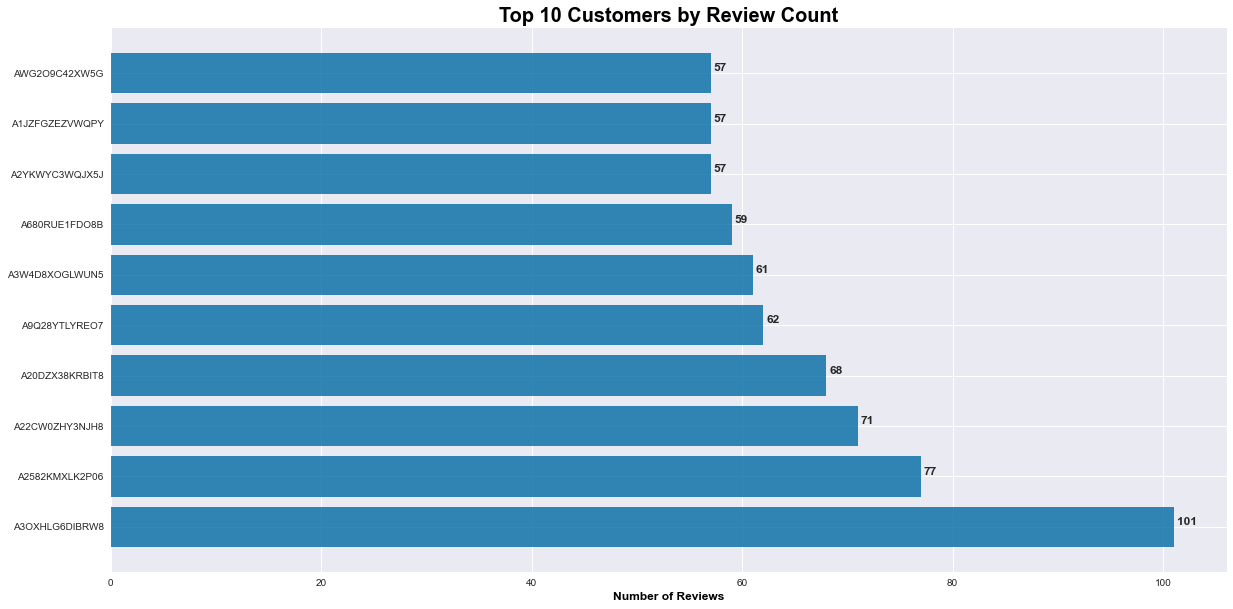

In [67]:
plt.style.use('tableau-colorblind10')

sample_top = cust_data.sort_values(['count_rev'], ascending=False).head(10)

# Top 10 customers by review count - bar plot
fig = plt.figure(figsize=(20, 10))
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, alpha=0.8)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

plt.show()


### Distribution of Number of Reviews

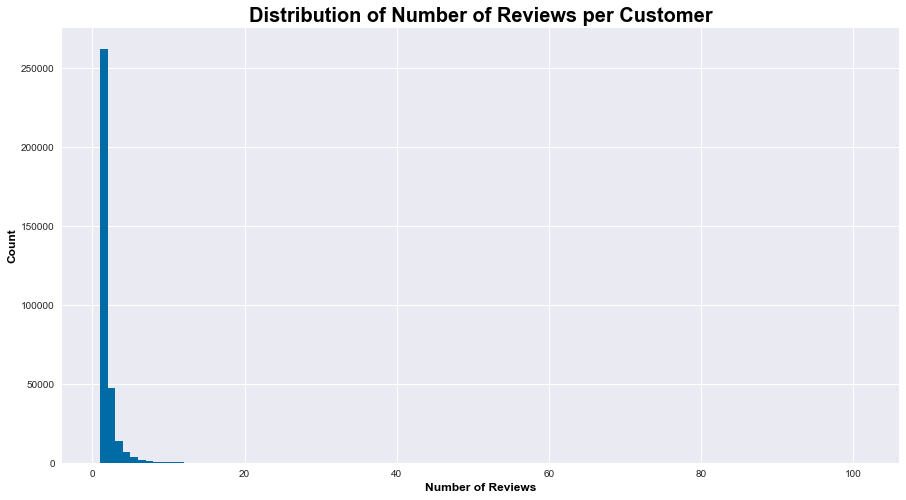

In [76]:
# distribution of number of reviews per customer
fig = plt.figure(figsize=(15, 8))
plt.style.use('tableau-colorblind10')
plt.hist(cust_data['count_rev'], bins=100)
plt.title("Distribution of Number of Reviews per Customer", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='black')
plt.show()

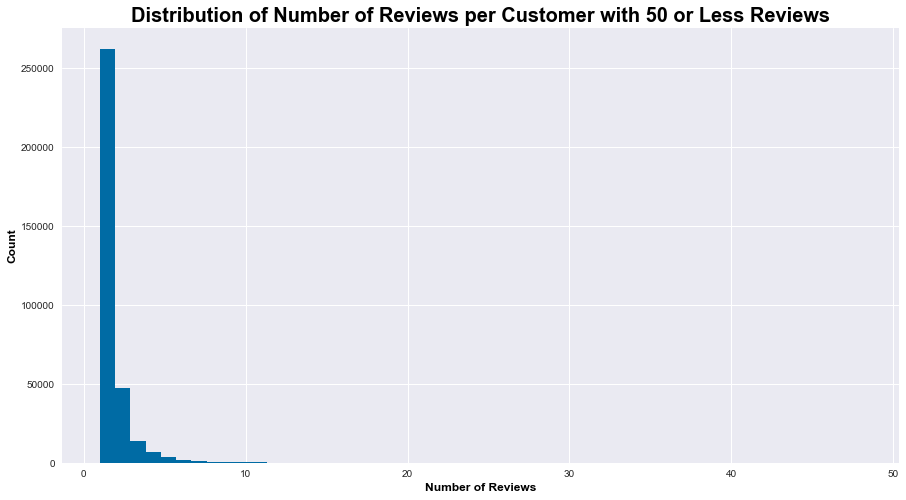

In [86]:
# distribution of number of reviews per customer
fig = plt.figure(figsize=(15, 8))
plt.style.use('tableau-colorblind10')
plt.hist(cust_data[cust_data['count_rev']<50]['count_rev'], bins=50)
plt.title("Distribution of Number of Reviews per Customer with 50 or Less Reviews", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='black')
plt.show()

In [84]:
# count of reviewers with more than 5 reviews
print("Number of Customers with more than 5 Reviews:", cust_data[cust_data['count_rev']>5].shape[0])

Number of Customers with more than 5 Reviews: 5774


### <a id='toc5_2_2_'></a>[Average Rating against Number of Reviews per Reviewer](#toc0_)

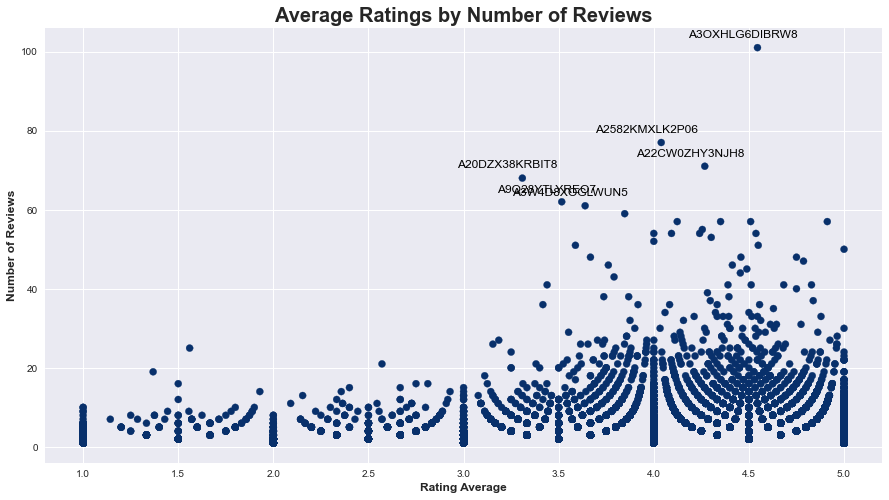

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
plt.scatter(cust_data.mean_rat, cust_data.count_rev, c=cust_data.mean_rat, cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data.index):
    if cust_data.count_rev[i] > 60:
        plt.annotate(id, (cust_data.loc[cust_data.index == id, "mean_rat"], cust_data.loc[cust_data.index == id, "count_rev"]), textcoords="offset points", xytext=(-15, 10), ha='center', fontsize=12, color='black')
    else:
        continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()


### <a id='toc5_2_3_'></a>[Top 10 Reviewers by Length of Reviews](#toc0_)

In [102]:
# Function to count sentences in a given text
def count_sentences(text):
    if isinstance(text, str):
        sentences = nltk.sent_tokenize(text)
        return len(sentences)
    else:
        return 0

# Function to count words in a given text
def count_words(text):
    if isinstance(text, str):
        words = text.split()
        return len(words)
    else:
        return 0

# Function to count characters in a given text
def count_characters(text):
    if isinstance(text, str):
        return len(text)
    else:
        return 0

# Apply the function to the 'reviewText' column
data['review_sentence_count'] = data['reviewText'].apply(count_sentences)

# Apply the function to the 'reviewText' column
data['review_word_count'] = data['reviewText'].apply(count_words)

# Apply the function to the 'reviewText' column
data['review_character_count'] = data['reviewText'].apply(count_characters)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pavansingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
# see data
display(data[['reviewText', 'review_character_count', 'review_word_count', 'review_sentence_count']].head(3))

print(data.reviewText[0])
print(data.reviewText[1])
print(data.reviewText[2])

,reviewText,review_character_count,review_word_count,review_sentence_count
0,product worked as advertised and am pleased wi...,56,9,1
1,nice to hear this cd beautiful,30,6,1
2,that one song has to be one of the best in ccm...,356,72,1


product worked as advertised and am pleased with results
nice to hear this cd beautiful
that one song has to be one of the best in ccm it tells the story of the resurrection from peters eyes it is very true to the bible in its lyrics adam where are you is another solid song this album has been forgotten by people who like heavier music dont let the long hair and early 70s look fool you this album is for people of all ages truely sensational


In [104]:
# top 10 longest reviews
display(data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10))

# view the review
data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10).values


136490    for operating a refrigerator or freezer  only ...
170273    update  this machine is way overpriced now i g...
227521    fuzzy wuzzys summary highly recommended with w...
260192    fuzzy wuzzys summary highly recommended with w...
260180    fuzzy wuzzys summary highly recommended with w...
19591     update 42313 if youve installed windows 7 or 8...
460616    warning this is a long complicated review if y...
227266    fuzzy wuzzys summary highly recommended with w...
290135    with the high sales of the first volume wwe qu...
17739     back in january of 2000 squaresoft was in the ...
Name: reviewText, dtype: object

array(['for operating a refrigerator or freezer  only step by step complete directions update 081511 mounted on the frig added pictures of how i mounted it to the frig i did this as an after thought and have a ton of regrets on the mounting design pictured so i can tell you a whole bunch of ways to improve on this the mount is simple pvc plastic plumbing pipes used one step spray paint made for plastic and metal 4 first dont do the complicated f shape shape of the assembled pipes with all the t fittings and elbows i used because you cant thread the thermostat thru the fittings and they are unnecessary anyway if you look at the picture note that i used t fittings to make it stand off the frig an inch or so this added a lot of complication for no reason whatsoever for yours simple make a f or c shape with 1 pvc pipes and the part that touches the frig will be nothing but a pipe no fittings on it drill hole thru pipes for mounting drill pilot hole thru frig sheet metal then use sheet meta

### <a id='toc5_2_4_'></a>[Top 10 Reviewers by Average Rating (with at least 50 reviews)](#toc0_)

,count_rev,mean_rat
reviewerID,,
AWG2O9C42XW5G,57,4.912
A1GQAKL9CGQLP1,51,4.549
A3OXHLG6DIBRW8,101,4.545
AMMNGUJK4HQJ5,54,4.537
A2R1HUYHXV7H18,57,4.509
A2YKWYC3WQJX5J,57,4.351
A3L1VJMHFWONCB,53,4.302
A22CW0ZHY3NJH8,71,4.268
A3V6Z4RCDGRC44,55,4.255


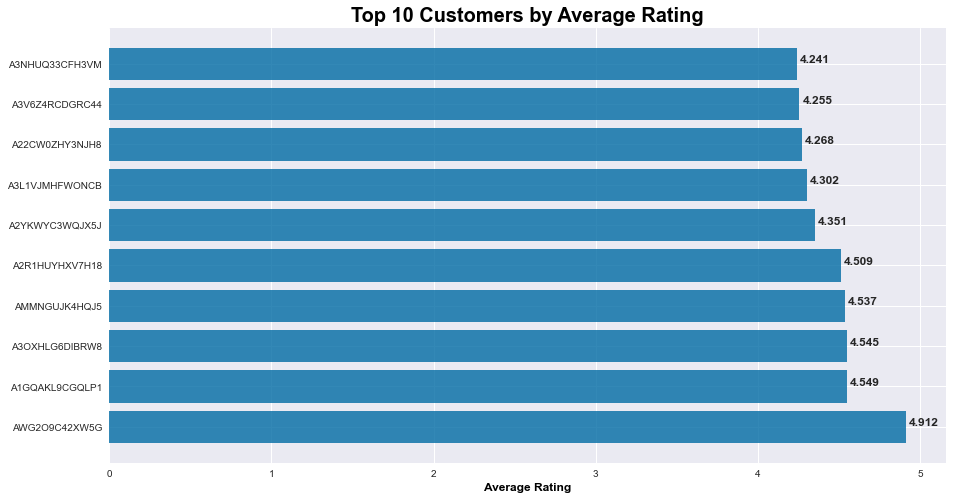

In [112]:
# top 10 customers by average rating
display(cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10))

# bar plot of top 10 customers by average rating
fig = plt.figure(figsize=(15,8))
bar = plt.barh(y=cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10).index, width=cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10).mean_rat, alpha=0.8)
plt.title("Top 10 Customers by Average Rating", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 20), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

plt.show()


***
# <a id='toc5_3_'></a>[Products](#toc0_)

### <a id='toc5_3_1_'></a>[Top 10 Products by Number of Reviews](#toc0_)

In [114]:
# How many items/products?
print("Number of Products:", data.asin.unique().size)

# Number reviews and average ratings per product
prod_data = data.groupby(['asin']).agg({"overall": ["count", "mean"]})
prod_data.columns = ['count_rev', 'mean_rat']
prod_data['mean_rat'] = np.round(prod_data.mean_rat,3)
display(prod_data.sort_values(by='count_rev', ascending=False).head(10))

Number of Products: 251615


,count_rev,mean_rat
asin,,
B0012Y0ZG2,878,4.842
B000URXP6E,856,4.838
B001OHV1H4,488,4.762
B00006L9LC,488,4.762
B000FI4S1E,391,4.941
B0009RF9DW,391,4.941
B0013BKDO8,336,4.438
B00DRALJ28,285,4.344
B000EORV8Q,232,4.931


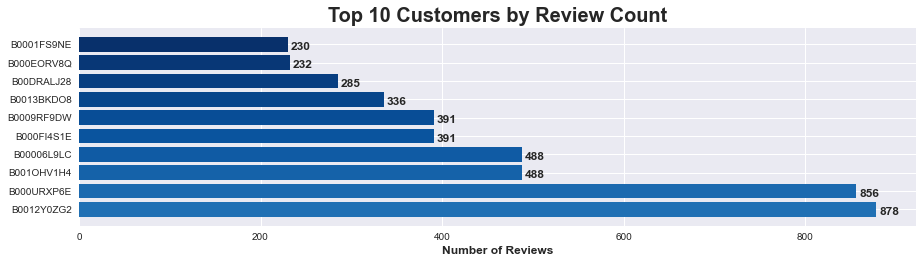

In [118]:
# Plot of Most / Fewest Reviews 
plt.style.use('seaborn-darkgrid')
sample_top = prod_data.sort_values(['count_rev'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Products by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


In [130]:
# what are these products in sample_top?
data[data.asin.isin(sample_top.index)][['title', 'asin']].drop_duplicates()


,title,asin
27919,citre shine moisture burst shampoo 16 fl oz,B00006L9LC
35304,sony vaio 80211abg ethernet converter pcwade80,B0001FS9NE
57303,yardley by yardley of london unisexs lay it on...,B0009RF9DW
70574,irocks red usb 20 illuminated 4port hub,B000EORV8Q
73156,fruits amp passion blue refreshing shower gel ...,B000FI4S1E
101007,bonne bell smackers bath and body starburst co...,B000URXP6E
125471,bath amp body works ile de tahiti moana coconu...,B0012Y0ZG2
127678,acurite 00613 humidity monitor with indoor the...,B0013BKDO8
163449,avalon grapefruit and geranium smoothing shamp...,B001OHV1H4
303206,acurite 00613 humidity monitor with indoor the...,B00DRALJ28


### Top 10 Products by Average Rating

Look at products with more than 100 Reviews

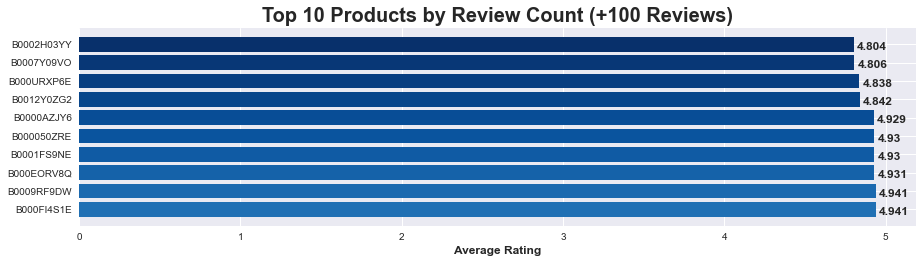

In [183]:
# Plot of Highest Average Ratings
plt.style.use('seaborn-darkgrid')
sample_top = prod_data[prod_data.count_rev > 100].sort_values(['mean_rat'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.mean_rat, color=colors)
plt.title("Top 10 Products by Review Count (+100 Reviews)", fontsize=20, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


In [184]:
# What are these products in sample_top?
data[data.asin.isin(sample_top.index)][['title', 'asin']].drop_duplicates()

,title,asin
18807,key span 4port usb hub white uh4wh,B000050ZRE
32261,iogear powerlinehomeplug wall mount ghpu21,B0000AZJY6
35304,sony vaio 80211abg ethernet converter pcwade80,B0001FS9NE
44845,daddario exl120 nickel wound electric guitar s...,B0002H03YY
54403,daddario ej17b25 phosphor bronze acoustic guit...,B0007Y09VO
57303,yardley by yardley of london unisexs lay it on...,B0009RF9DW
70574,irocks red usb 20 illuminated 4port hub,B000EORV8Q
73156,fruits amp passion blue refreshing shower gel ...,B000FI4S1E
101007,bonne bell smackers bath and body starburst co...,B000URXP6E
125471,bath amp body works ile de tahiti moana coconu...,B0012Y0ZG2


### <a id='toc5_3_2_'></a>[Product Average Rating vs Number of Reviews](#toc0_)

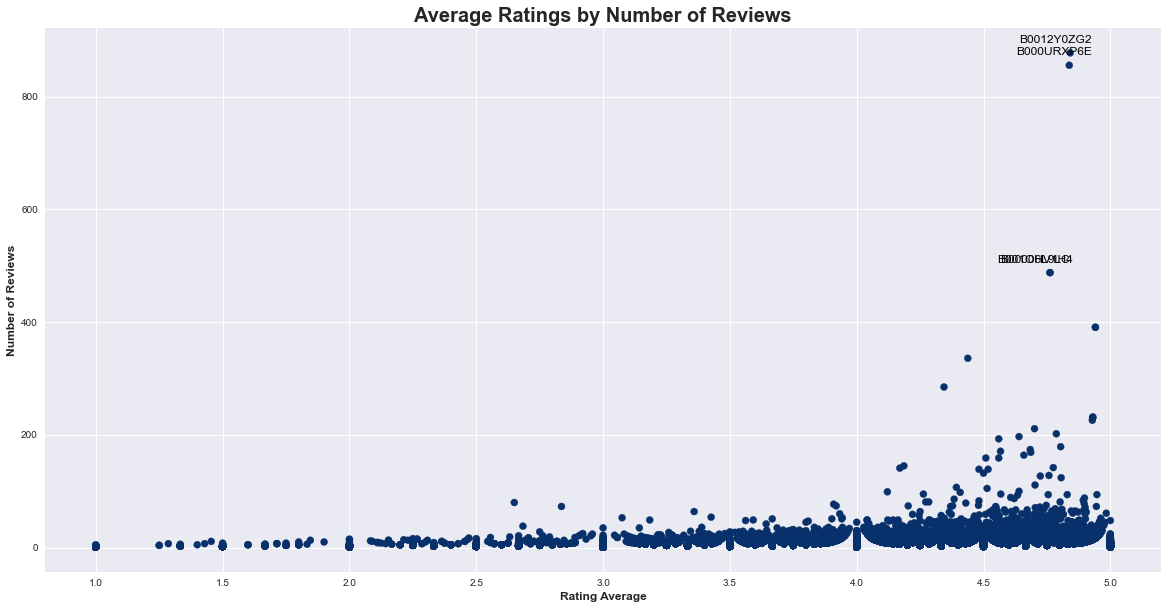

In [131]:
# Plot of Average Rating vs Count Reviews
fig = plt.figure(figsize=(20, 10))

plt.scatter(prod_data.mean_rat, prod_data.count_rev, c=prod_data.mean_rat,  cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(prod_data.index):
    if (prod_data.count_rev[i] >= 400):
        if id == 'B0001FS9NE':
            xytext = (15, -15)
        else: xytext=(-15,10)
        plt.annotate(id, (prod_data.loc[prod_data.index==id, "mean_rat"], prod_data.loc[prod_data.index==id, "count_rev"]), textcoords="offset points",xytext=xytext, ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()

### <a id='toc5_3_3_'></a>[Number of Reviews per Product over Time](#toc0_)

For products with over 100 reviews

In [148]:
asin = prod_data[prod_data.count_rev > 100].sort_values(by='mean_rat', ascending=False).index
print("Number of Products with more than 100 reviews:", len(asin))

# plot reviews per product in asin over time
print("First Review:", data.reviewTime.min(), "\nLast Review:", data.reviewTime.max())


Number of Products with more than 100 reviews: 35
First Review: 1998-04-28 
Last Review: 2018-10-03


In [164]:
# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['asin'].isin(asin)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
prod_year_count = filtered_data.groupby(['asin', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(prod_year_count.head(5))

,asin,reviewYear,count_rev
0,B000050ZRE,2002,2
1,B000050ZRE,2003,1
2,B000050ZRE,2004,6
3,B000050ZRE,2005,4
4,B000050ZRE,2006,1


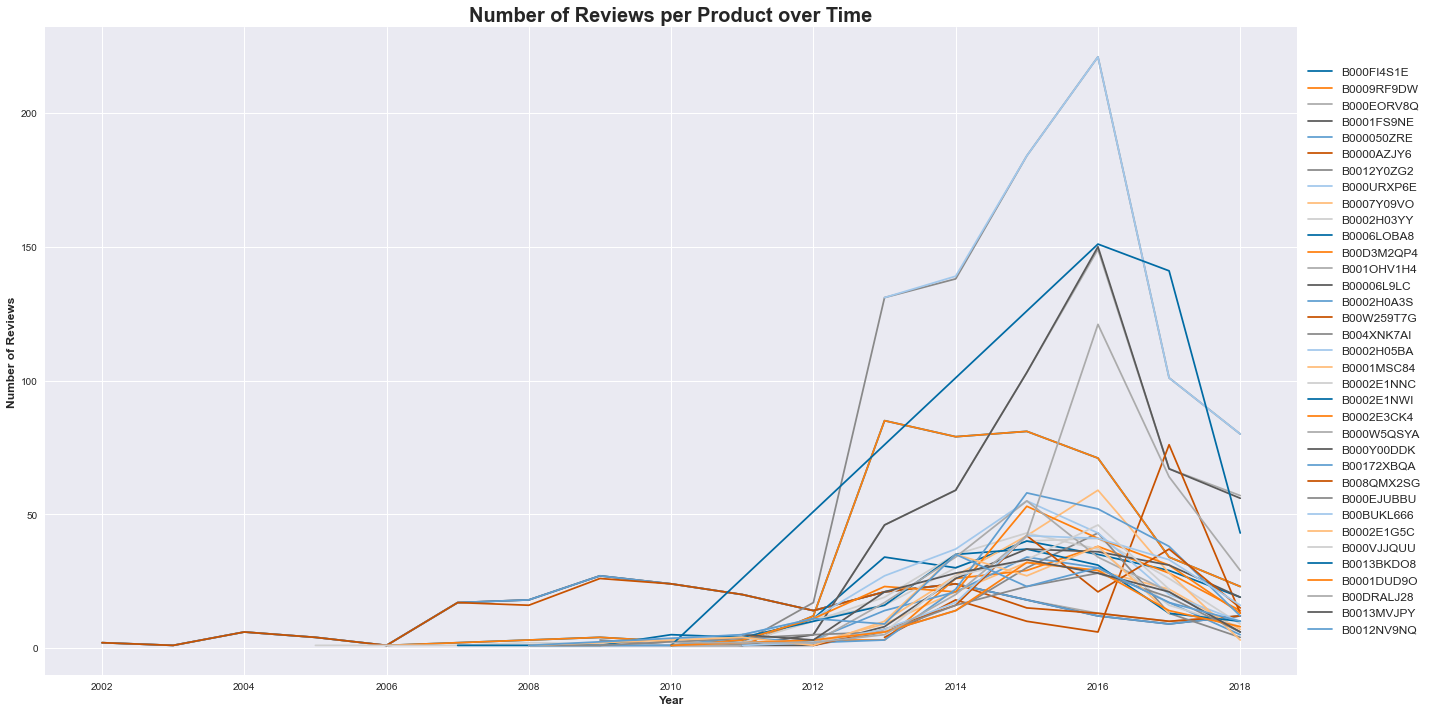

In [155]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(asin):
    plt.plot(prod_year_count[prod_year_count.asin==id].reviewYear, prod_year_count[prod_year_count.asin==id].count_rev, label=id)
    last_count = prod_year_count[prod_year_count.asin==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Product over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [163]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(asin):
    fig.add_trace(go.Scatter(x=prod_year_count[prod_year_count.asin==id].reviewYear,
                             y=prod_year_count[prod_year_count.asin==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = prod_year_count[prod_year_count.asin==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Product over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### <a id='toc5_3_4_'></a>[Average Rating per Product over Time](#toc0_)

In [172]:
import pandas as pd

# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['asin'].isin(asin)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
prod_year_avg_rating = filtered_data.groupby(['asin', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
prod_year_avg_rating.avg_rating = np.round(prod_year_avg_rating.avg_rating, 3)
display(prod_year_avg_rating.head(5))


,asin,reviewYear,avg_rating
0,B000050ZRE,2002,5.0
1,B000050ZRE,2003,5.0
2,B000050ZRE,2004,5.0
3,B000050ZRE,2005,5.0
4,B000050ZRE,2006,5.0


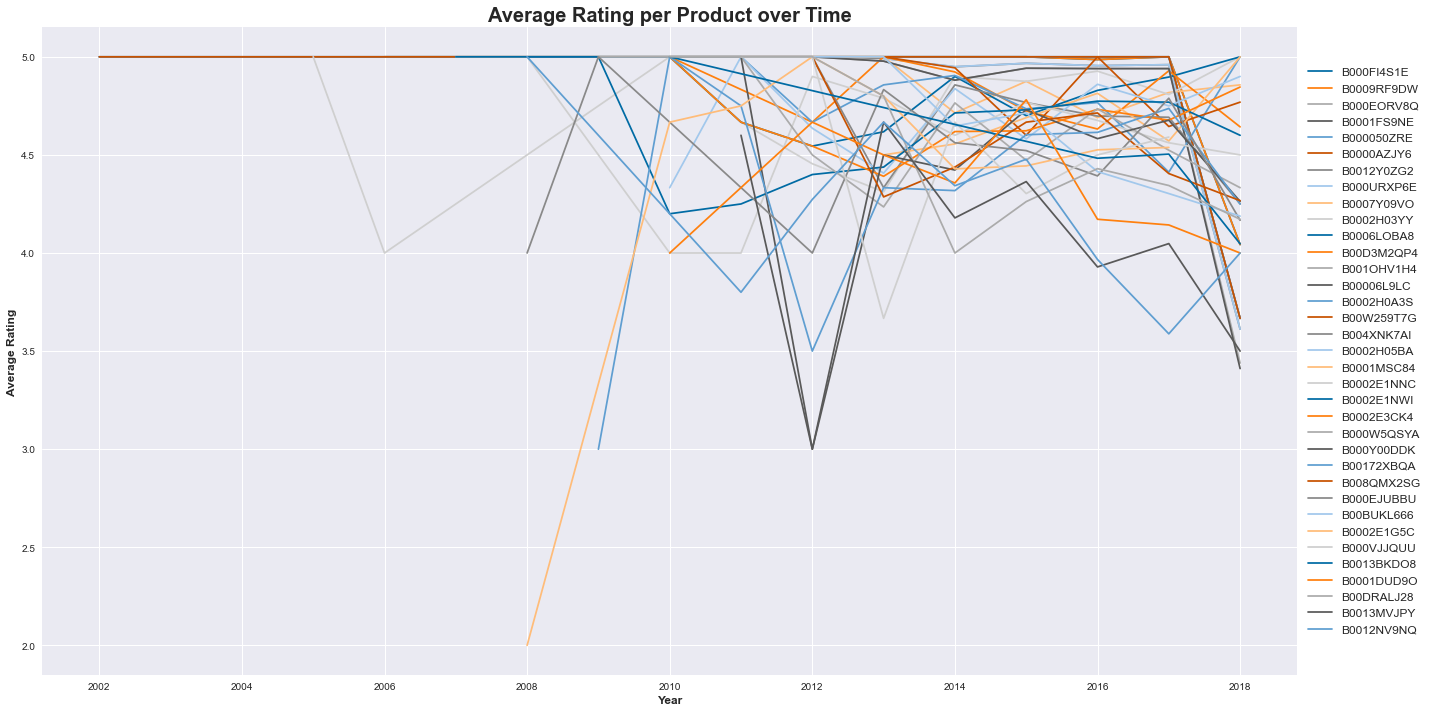

In [175]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(asin):
    plt.plot(prod_year_avg_rating[prod_year_avg_rating.asin==id].reviewYear, prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating, label=id)
    last_count = prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Product over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [176]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(asin):
    fig.add_trace(go.Scatter(x=prod_year_avg_rating[prod_year_avg_rating.asin==id].reviewYear,
                             y=prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Product over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()


***
## <a id='toc5_4_'></a>[Categories](#toc0_)

In [185]:
# How many items/products?
print("Number of Categories:", data.category_x.unique().size)

# Number reviews and average ratings per category
cat_count = data.groupby(['category_x']).agg({"overall": ["count", "mean"]})
cat_count.columns = ['count_rev', 'mean_rat']
cat_count['mean_rat'] = np.round(cat_count.mean_rat,3)
display(cat_count.sort_values(by='count_rev', ascending=False).head(10))

Number of Categories: 26


,count_rev,mean_rat
category_x,,
electronics,24941,4.255
pet supplies,24928,4.269
cell phones,24905,4.231
toys and games,24875,4.470
office products,24870,4.471
kindle store,24837,4.401
automotive,24828,4.463
video games,24809,4.221
musical instruments,24782,4.470


### <a id='toc5_4_2_'></a>[Categories by Average Rating](#toc0_)

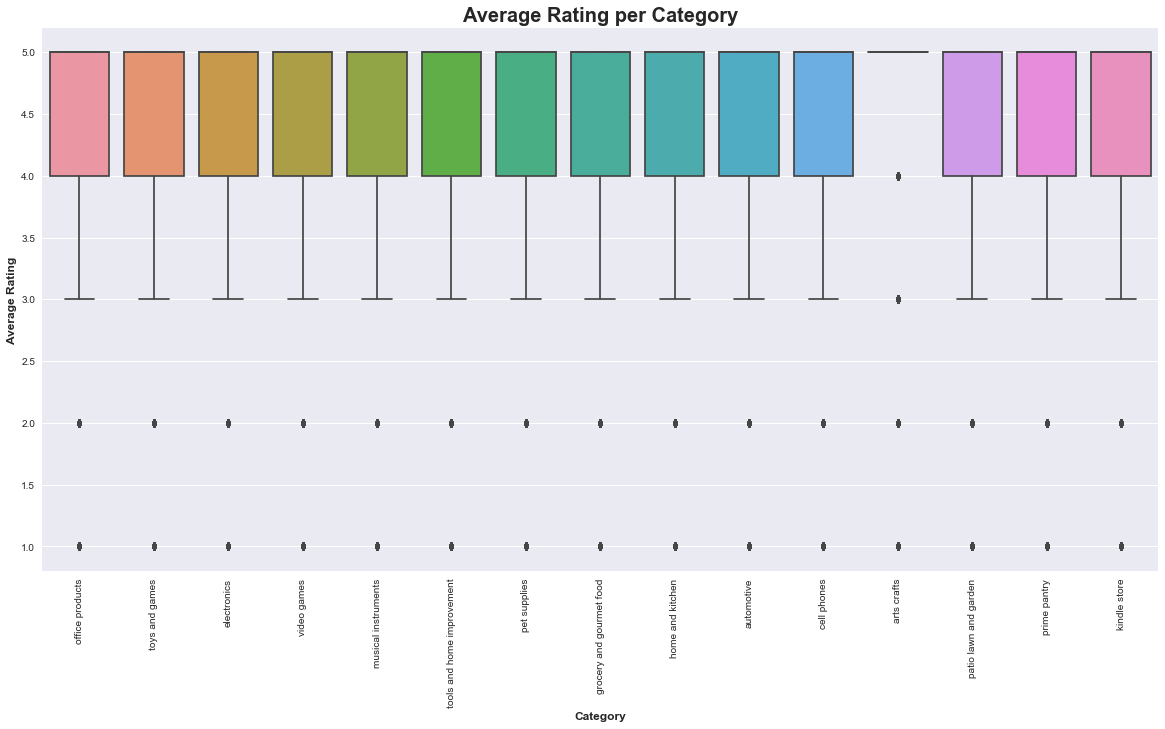

In [196]:
# boxplot of average rating per category using cat_count
fig = plt.figure(figsize=(20, 10))
sns.boxplot(x='category_x', y='overall', data=data[data.category_x.isin(cat_count.sort_values(by='count_rev', ascending=False).head(15).index)])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Category", fontsize=20, fontweight='bold')
plt.show()


In [199]:
# get the average rating per category
data.groupby(['category_x'])['overall'].mean().reset_index(name='avg_rating')


,category_x,avg_rating
0,appliances,4.592040
1,arts crafts,4.574068
2,automotive,4.462703
3,beauty,4.772387
4,cds and vinyl,4.424196
5,cell phones,4.230636
6,clothing shoes and jewelry,4.239025
7,digital music,4.391691
8,electronics,4.255162
9,gift cards,4.896629


### <a id='toc5_4_4_'></a>[Average Rating of Categories over Time](#toc0_)

In [202]:
data.groupby(['category_x']).size()>1000

category_x
appliances                    False
arts crafts                    True
automotive                     True
beauty                         True
cds and vinyl                  True
cell phones                    True
clothing shoes and jewelry     True
digital music                 False
electronics                    True
gift cards                     True
grocery and gourmet food       True
home and kitchen               True
industrial                     True
kindle store                   True
magazine subscriptions         True
movies and tv                  True
musical instruments            True
office products                True
patio lawn and garden          True
pet supplies                   True
prime pantry                   True
software                       True
sports and outdoors            True
tools and home improvement     True
toys and games                 True
video games                    True
dtype: bool

In [203]:
# categories with more than 1000 reviews
categories = data.groupby(['category_x']).size()[data.groupby(['category_x']).size()>1000].index

# Filter data for products in 'asin'
filtered_data = data[data['category_x'].isin(categories)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
cat_year_count = filtered_data.groupby(['category_x', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(cat_year_count.head(5))

,category_x,reviewYear,count_rev
0,arts crafts,2006,1
1,arts crafts,2007,2
2,arts crafts,2008,8
3,arts crafts,2009,21
4,arts crafts,2010,51


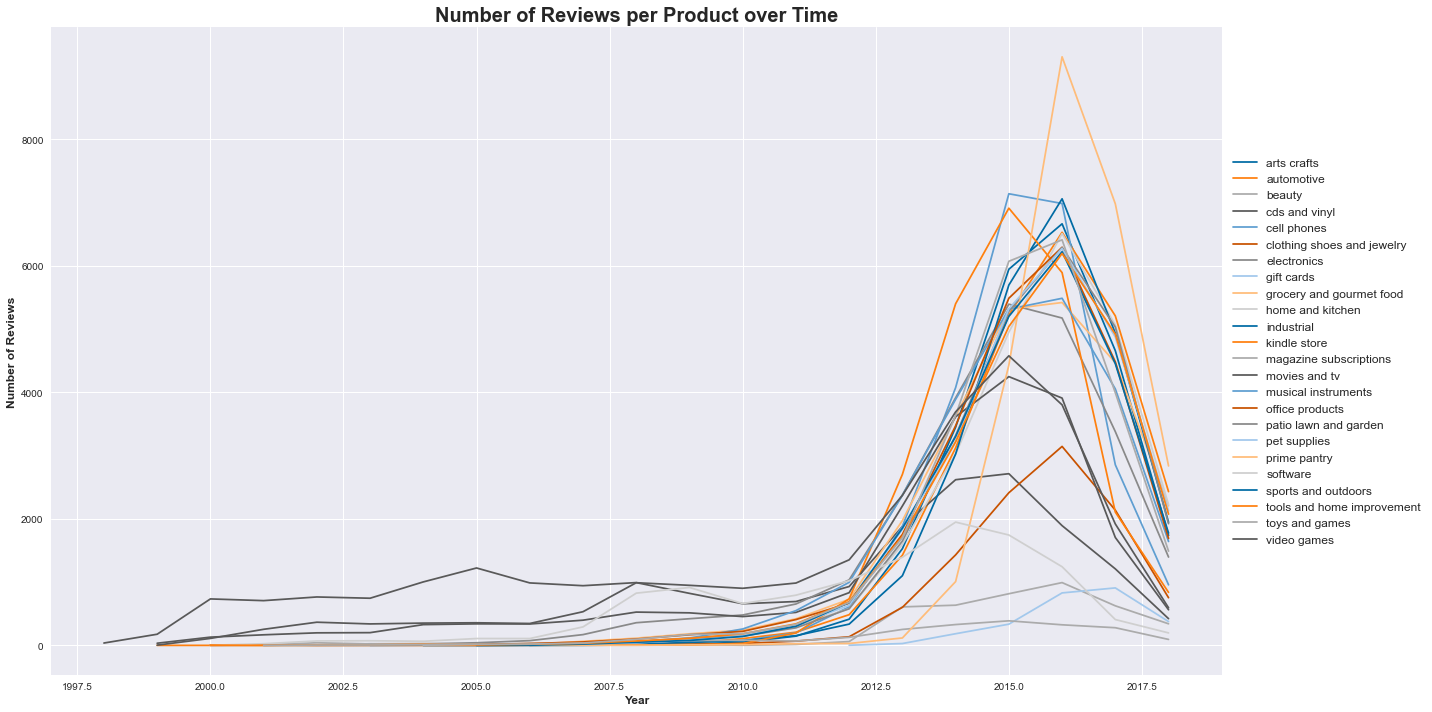

In [206]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(categories):
    plt.plot(cat_year_count[cat_year_count.category_x==id].reviewYear, cat_year_count[cat_year_count.category_x==id].count_rev, label=id)
    last_count = cat_year_count[cat_year_count.category_x==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Category over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [207]:
fig = go.Figure()

for i, id in enumerate(categories):
    fig.add_trace(go.Scatter(x=cat_year_count[cat_year_count.category_x==id].reviewYear,
                             y=cat_year_count[cat_year_count.category_x==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = cat_year_count[cat_year_count.category_x==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Category over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### Average Rating per Category over Time

In [208]:
# categories with more than 1000 reviews
categories = data.groupby(['category_x']).size()[data.groupby(['category_x']).size()>1000].index

# Filter data for products in 'asin'
filtered_data = data[data['category_x'].isin(categories)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
cat_year_avg_rating = filtered_data.groupby(['category_x', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
cat_year_avg_rating.avg_rating = np.round(cat_year_avg_rating.avg_rating, 3)
display(cat_year_avg_rating.head(5))


,category_x,reviewYear,avg_rating
0,arts crafts,2006,4.000
1,arts crafts,2007,5.000
2,arts crafts,2008,4.625
3,arts crafts,2009,4.524
4,arts crafts,2010,4.392


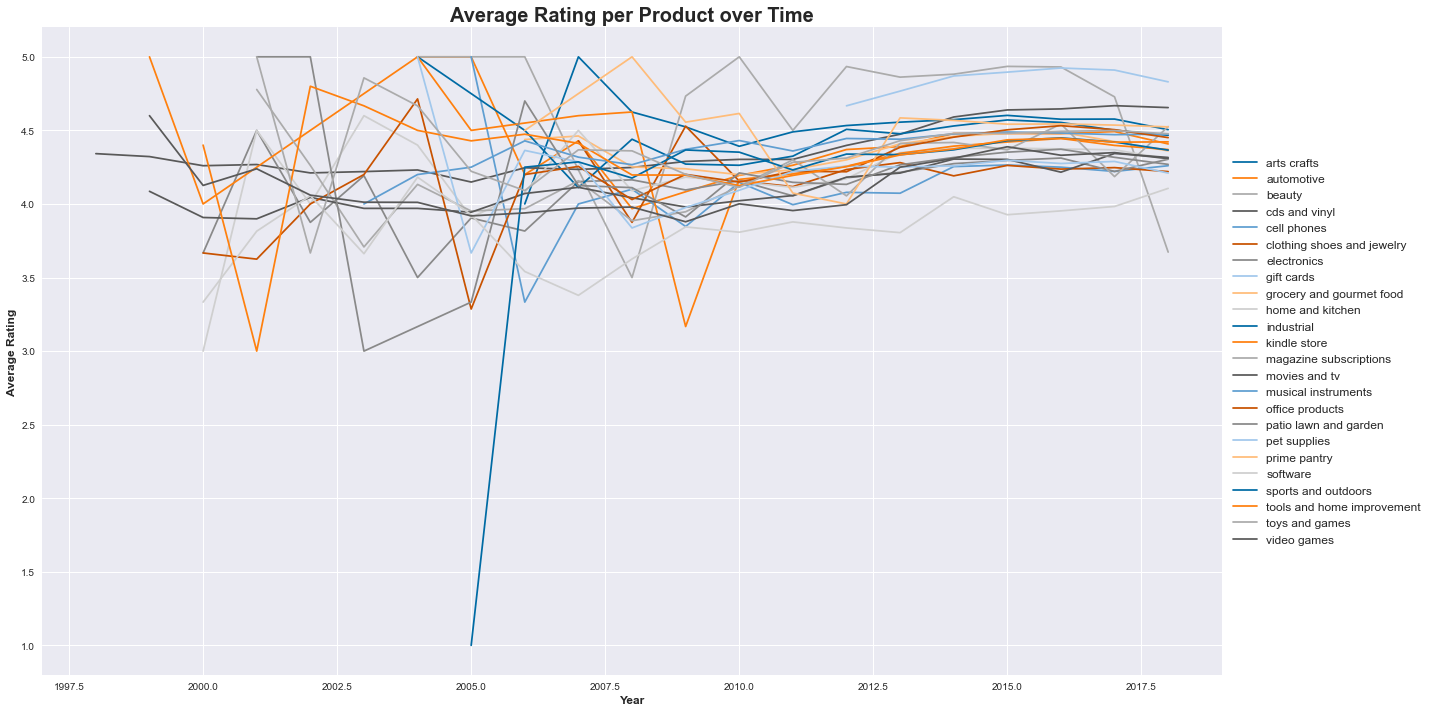

In [209]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(categories):
    plt.plot(cat_year_avg_rating[cat_year_avg_rating.category_x==id].reviewYear, cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating, label=id)
    last_count = cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Category over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [210]:
fig = go.Figure()

for i, id in enumerate(categories):
    fig.add_trace(go.Scatter(x=cat_year_avg_rating[cat_year_avg_rating.category_x==id].reviewYear,
                             y=cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = cat_year_avg_rating[cat_year_avg_rating.category_x==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Category over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



***
## <a id='toc5_5_'></a>[Reviews and Review Text](#toc0_)

### Review Length vs. Rating

### <a id='toc5_5_1_'></a>[Top 10 Reviews by Length](#toc0_)

### <a id='toc5_5_2_'></a>[Average Review Length over Time](#toc0_)

### <a id='toc5_5_3_'></a>[Number of Reviews over Time](#toc0_)

***
## <a id='toc5_6_'></a>[Brands](#toc0_)

### <a id='toc5_6_1_'></a>[Top 10 Brands by Number of Reviews](#toc0_)

### <a id='toc5_6_2_'></a>[Top 10 Brands by Average Rating](#toc0_)

### <a id='toc5_6_3_'></a>[Average Rating of Brands over Time for Top 10 Brands](#toc0_)





***
# <a id='toc6_'></a>[Sentiment Analysis](#toc0_)



***
## <a id='toc6_2_'></a>[Sentiment per Review](#toc0_)

### <a id='toc6_2_1_'></a>[Most Positive Reviews](#toc0_)

### <a id='toc6_2_2_'></a>[Most Negative Reviews](#toc0_)

### <a id='toc6_2_3_'></a>[Most Positive Reviewers](#toc0_)

### <a id='toc6_2_4_'></a>[Most Negative Reviewers](#toc0_)

### <a id='toc6_2_5_'></a>[Distribution of Sentiment Scores](#toc0_)

### Most Positive and Negative Words Used

***
## <a id='toc6_3_'></a>[Sentiment per Product](#toc0_)

### <a id='toc6_3_1_'></a>[Most Positive Products](#toc0_)

### <a id='toc6_3_2_'></a>[Most Negative Products](#toc0_)



***
## <a id='toc6_4_'></a>[Sentiment per Category](#toc0_)

### <a id='toc6_4_1_'></a>[Most Positive Categories](#toc0_)

### <a id='toc6_4_2_'></a>[Most Negative Categories](#toc0_)



***
## <a id='toc6_5_'></a>[Sentiment per Brand](#toc0_)

### <a id='toc6_5_1_'></a>[Most Positive Brands](#toc0_)

### <a id='toc6_5_2_'></a>[Most Negative Brands](#toc0_)

